In [1]:
#importing the necessary modules
from PIL import Image
from keras.preprocessing.image import load_img,img_to_array
import numpy as np
from keras.models import load_model
import os
import matplotlib.pyplot as plt
dir_path ='./Data-set/Images/'
lab = list(os.listdir(dir_path))

model = load_model('./dog_class_model.h5',compile=False)



In [2]:
# function to download and predict
def download_and_predict(urls, filenames, model, label_mapping):
    num_images = len(urls)
    ncols = 3  # Number of columns in the subplot grid
    nrows = (num_images + ncols - 1) // ncols

    plt.figure(figsize=(15, 10))
    
    for i in range(num_images):
        url = urls[i]
        filename = filenames[i]
        
        # Download and save the image
        os.system("curl -s {} -o {}".format(url, filename))
        img = Image.open(filename)
        img = img.convert('RGB')
        img = img.resize((224, 224))
        
        # Predict
        img_array = img_to_array(img)
        img_array = img_array / 255
        img_array = np.expand_dims(img_array, axis=0)
        answer = model.predict(img_array)
        y_class = answer.argmax(axis=-1)
        prediction = label_mapping[y_class[0]]
        prediction = prediction.split("-")[1]
        
        # Plot the image with the predicted label
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(img)
        plt.title(f"Prediction: {prediction}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
# Replace 'your_model', 'label_mapping', 'urls', and 'filenames' with your specific values
# download_and_predict(urls, filenames, your_model, label_mapping)


In [3]:
image_urls = ["https://www.thesprucepets.com/thmb/O3IfJB8TFRPnNSXp_qblTTB30Fg=/2083x0/filters:no_upscale():strip_icc()/ToyFoxTerrierGettyImages-1178180163SergeyRyumin-8b8cb34a6406454185ddeea97b8a0c45.jpg",
              "https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Arabian_Hound_001_U.jpg/640px-Arabian_Hound_001_U.jpg",
            "https://dogtime.com/wp-content/uploads/sites/12/2011/01/GettyImages-172905375.jpg",
              "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Mops_oct09_cropped2.jpg/640px-Mops_oct09_cropped2.jpg",
            "https://images.unsplash.com/photo-1617895153857-82fe79adfcd4",
               "https://media.discordapp.net/attachments/1124020930625155242/1155419070599008286/beagle.jpeg"
                ]

In [4]:
filenames = [
    "./toy_terrier.jpg",
    "./afghan_hound.jpg",
    "./chihuahua.jpg",
    "./pug.jpg",
    "./siberian_husky.jpg",
    "./beagle.jpg"
]

1/1 [==============================] - 0s 117ms/step


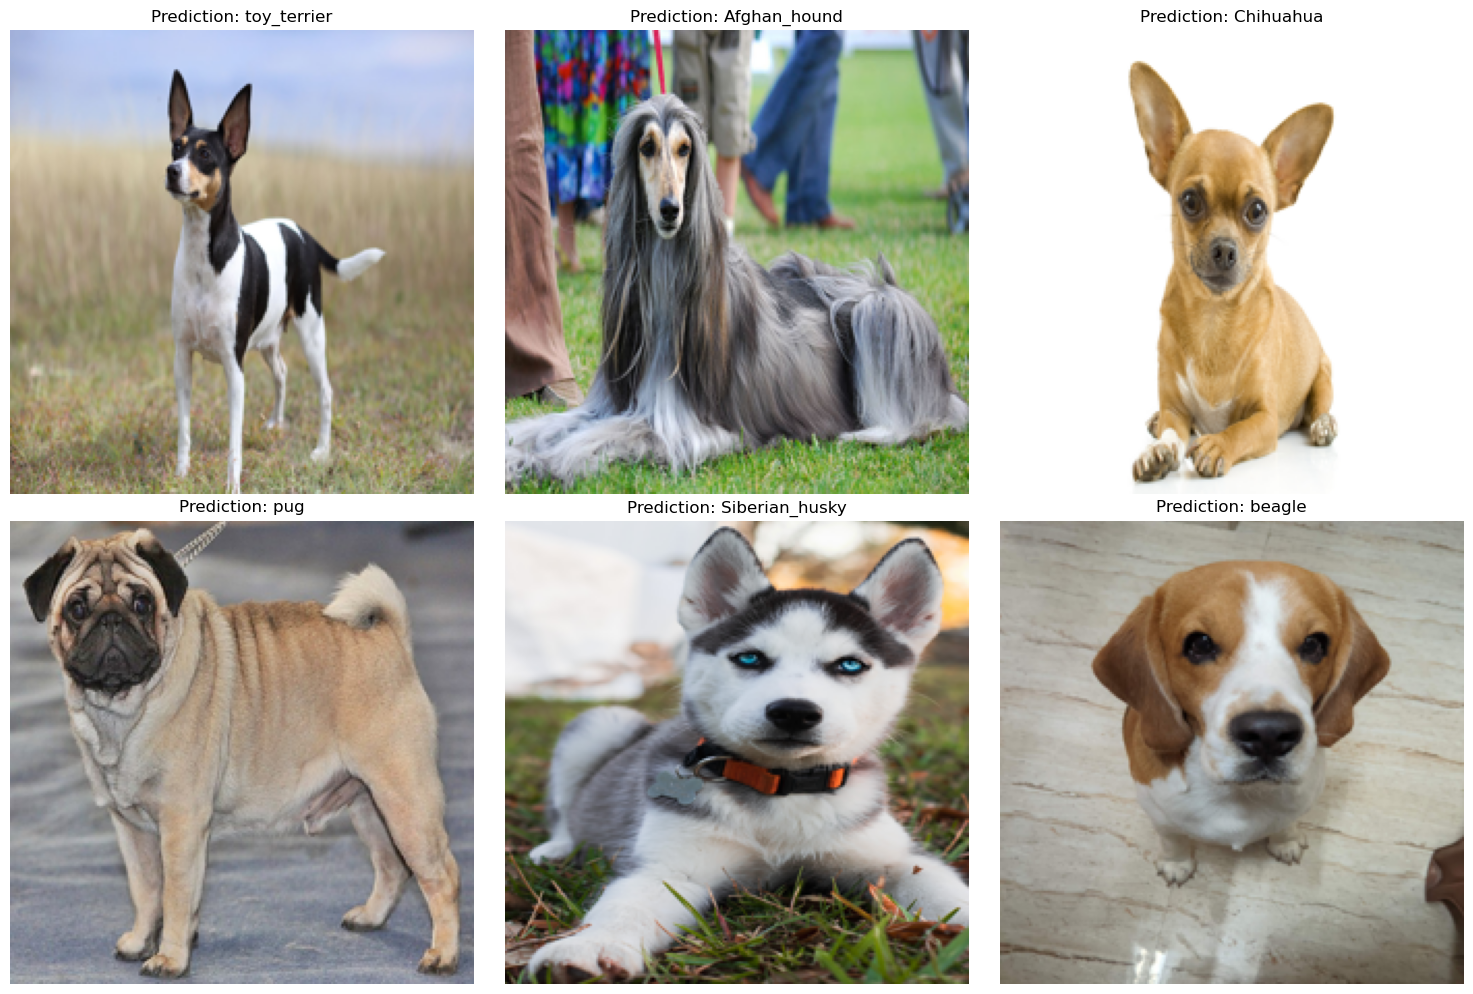

In [5]:
#predicting the model
download_and_predict(image_urls,filenames,model,lab)